In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import binom_test
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# Cargaremos el archivo Excel modificado que el usuario acaba de subir
file_path_excel_modificado = 'dataset_empleados.xlsx'

In [15]:
# Utilizamos Pandas para cargar el archivo Excel modificado
df_empleados_excel_modificado = pd.read_excel(file_path_excel_modificado)

# Mostrar las primeras filas del DataFrame modificado para verificar su carga
df_empleados_excel_modificado.head()

,ID,Genero,Nivel_Educacion,Edad,Experiencia_Laboral,Especializacion,Lenguajes_Programacion,Tipo_Empresa,Ubicacion_Geografica,Salario,Horas_Trabajo,Proyectos_Actuales
0,1,Masculino,Licenciatura,28,6,Desarrollo Web,"JavaScript, HTML, CSS",Startup,"Nueva York, EE. UU.",60000,40,Aplicación Móvil
1,2,Femenino,Maestría,35,10,Seguridad,"Python, C++, Java",Corporación,"San Francisco, EE. UU.",80000,45,Análisis de Datos
2,3,Masculino,Licenciatura,26,4,Desarrollo Móvil,"Swift, Java",Startup,"Londres, Reino Unido",55000,42,Juegos en Línea
3,4,Femenino,Doctorado,40,15,Inteligencia Artificial,"Python, R",Startup,"Toronto, Canadá",95000,50,Robótica
4,5,No Binario,Licenciatura,30,7,Análisis de Datos,"SQL, R",Agencia,"Washington, D.C., EE. UU.",62000,38,Ciberseguridad


In [16]:
# Calculamos el promedio de edad y experiencia laboral separados por género
promedios_por_genero = df_empleados_excel_modificado.groupby('Genero').agg({
    'Edad': 'mean',
    'Experiencia_Laboral': 'mean'
})

promedios_por_genero


,Edad,Experiencia_Laboral
Genero,,
Femenino,36.608696,11.434783
Masculino,31.157895,7.315789
No Binario,31.857143,7.857143


In [17]:
# Extraemos la columna de horas de trabajo del DataFrame modificado
horas_trabajo_modificado = df_empleados_excel_modificado['Horas_Trabajo']

# Calculamos la media y la desviación estándar de las horas de trabajo
media_horas_modificado = np.mean(horas_trabajo_modificado)
std_horas_modificado = np.std(horas_trabajo_modificado, ddof=1)  # ddof=1 para muestra

# Número de observaciones
n_modificado = len(horas_trabajo_modificado)

# Calculamos el intervalo de confianza del 95% para la media
confianza = 0.95
sem_modificado = std_horas_modificado / np.sqrt(n_modificado)  # Error estándar de la media
intervalo_confianza_modificado = stats.t.interval(confianza, df=n_modificado-1, loc=media_horas_modificado, scale=sem_modificado)


print("intervalo de confianza sobre las horas de trabajo",intervalo_confianza_modificado)


intervalo de confianza sobre las horas de trabajo (42.54906633573436, 44.675423460184014)


In [18]:
#Intervalo de confianza sin T student
# Extraemos la columna de horas de trabajo del DataFrame modificado
horas_trabajo_modificado = df_empleados_excel_modificado['Horas_Trabajo']

# Calculamos la media y la desviación estándar de las horas de trabajo
media_horas_modificado = np.mean(horas_trabajo_modificado)
std_horas_modificado = np.std(horas_trabajo_modificado, ddof=1)  # ddof=1 para muestra

# Número de observaciones
n_modificado = len(horas_trabajo_modificado)

# Calculamos el intervalo de confianza del 95% para la media
confianza = 0.95
sem_modificado = std_horas_modificado / np.sqrt(n_modificado)
intervalo_confianza_modificado = stats.norm.interval(confianza, loc=media_horas_modificado, scale=sem_modificado)

print("intervalo de confianza sobre las horas de trabajo",intervalo_confianza_modificado)

intervalo de confianza sobre las horas de trabajo (42.57585990251015, 44.64862989340822)


In [28]:
# Preparación de los datos para el modelo de regresión lineal
X = df_empleados_excel_modificado['Edad']  # Variable independiente
y = df_empleados_excel_modificado['Salario']  # Variable dependiente

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener el resumen del modelo
resumen_modelo = modelo.summary()
resumen_modelo


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Salario   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     304.3
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           3.67e-22
Time:                        15:54:22   Log-Likelihood:                -481.86
No. Observations:                  49   AIC:                             967.7
Df Residuals:                      47   BIC:                             971.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.037e+04   4901.931     -2.115      0.040   -2.02e+04    -507.158
Edad        2505.7695    143.644     17.444      0.000    2216.795    2794.744
==============================================================================
Omnibus:                        1.085   Durbin-Watson:                   2.754
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.099
Skew:                           0.247   Prob(JB):                        0.577
Kurtosis:                       2.458   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Suponiendo que df_empleados_excel_modificado es tu DataFrame
correlacion = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])

print(f"Coeficiente de correlación de Pearson: {correlacion}")

Coeficiente de correlación de Pearson: 0.930705317724075


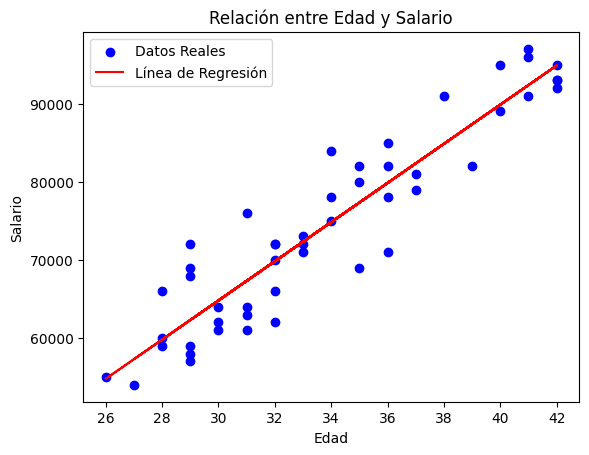

In [29]:
# Obtenemos los valores de la edad y los salarios predichos por el modelo
X_valores = df_empleados_excel_modificado['Edad']
y_pred = modelo.predict()

# Gráfico de dispersión de los datos reales
plt.scatter(X_valores, y, label='Datos Reales', color='blue')

# Línea de tendencia del modelo de regresión
plt.plot(X_valores, y_pred, label='Línea de Regresión', color='red')

# Etiquetas y leyenda
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()

# Mostrar el gráfico
plt.show()


In [30]:
# Calculamos el coeficiente de correlación de Pearson entre la edad y el salario
coef_correlacion = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])

print("Correlacion edad y salario:", coef_correlacion)

Correlacion edad y salario: 0.930705317724075


Coeficiente de correlación de Pearson: 0.9659206584056843


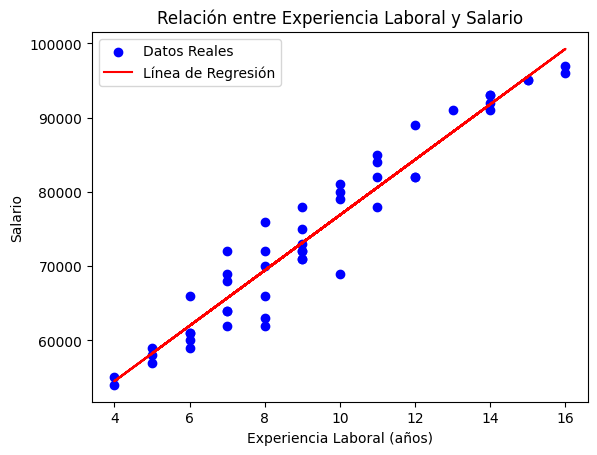

In [37]:
# Calcular la correlación lineal
correlacion = df_empleados_excel_modificado['Experiencia_Laboral'].corr(df_empleados_excel_modificado['Salario'])
print(f"Coeficiente de correlación de Pearson: {correlacion}")

# Preparación de los datos para el modelo de regresión lineal
X = df_empleados_excel_modificado['Experiencia_Laboral']  # Variable independiente
y = df_empleados_excel_modificado['Salario']  # Variable dependiente

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener los valores predichos por el modelo
y_pred = modelo.predict(X)

# Gráfico de dispersión de los datos reales
plt.scatter(df_empleados_excel_modificado['Experiencia_Laboral'], df_empleados_excel_modificado['Salario'], label='Datos Reales', color='blue')

# Línea de tendencia del modelo de regresión
plt.plot(df_empleados_excel_modificado['Experiencia_Laboral'], y_pred, label='Línea de Regresión', color='red')

# Etiquetas y leyenda
plt.title('Relación entre Experiencia Laboral y Salario')
plt.xlabel('Experiencia Laboral (años)')
plt.ylabel('Salario')
plt.legend()

# Mostrar el gráfico
plt.show()

Coeficiente de correlación de Pearson entre Edad y Salario: 0.930705317724075
Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: 0.9659206584056843


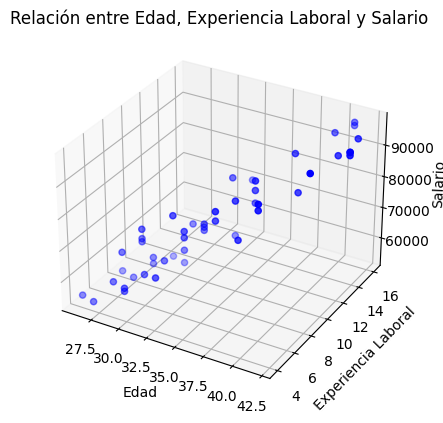

In [39]:
# Calcular las correlaciones lineales
correlacion_edad_salario = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])
correlacion_experiencia_salario = df_empleados_excel_modificado['Experiencia_Laboral'].corr(df_empleados_excel_modificado['Salario'])

print(f"Coeficiente de correlación de Pearson entre Edad y Salario: {correlacion_edad_salario}")
print(f"Coeficiente de correlación de Pearson entre Experiencia Laboral y Salario: {correlacion_experiencia_salario}")

# Gráfico de dispersión 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Datos para el gráfico
x = df_empleados_excel_modificado['Edad']
y = df_empleados_excel_modificado['Experiencia_Laboral']
z = df_empleados_excel_modificado['Salario']

# Crear el gráfico de dispersión
ax.scatter(x, y, z, color='b')

# Etiquetas y título
ax.set_xlabel('Edad')
ax.set_ylabel('Experiencia Laboral')
ax.set_zlabel('Salario')
ax.set_title('Relación entre Edad, Experiencia Laboral y Salario')

# Mostrar el gráfico
plt.show()

In [41]:
# Cargar el dataset
file_path = 'dataset_empleados.xlsx'
data = pd.read_excel(file_path)

# Contar el número de mujeres en la muestra
num_mujeres = data['Genero'].str.strip().str.lower().value_counts().get('femenino', 0)
total_empleados = len(data)

# Proporción observada de mujeres en la muestra
proporcion_mujeres = num_mujeres / total_empleados

# Nueva hipótesis nula
p_h0_nueva = 0.32

# Realizar el test de hipótesis con la nueva hipótesis nula
# Usando 'greater' como alternativa porque H1: p > 0.19
p_value_nueva = binom_test(num_mujeres, total_empleados, p_h0_nueva, alternative='greater')

# Imprimir los resultados
print("Número de mujeres en la muestra:", num_mujeres)
print("Total de empleados en la muestra:", total_empleados)
print("Proporción observada de mujeres:", proporcion_mujeres)
print("Valor p del test de hipótesis:", p_value_nueva)


Número de mujeres en la muestra: 23
Total de empleados en la muestra: 49
Proporción observada de mujeres: 0.46938775510204084
Valor p del test de hipótesis: 0.020543795543531772


C:\Users\DireC\AppData\Local\Temp\ipykernel_1924\3086246041.py:17: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value_nueva = binom_test(num_mujeres, total_empleados, p_h0_nueva, alternative='greater')


In [40]:
# Agrupa por 'Nivel_Educacion' y realiza cálculos estadísticos
resumen_estadistico = df_empleados_excel_modificado.groupby('Nivel_Educacion')['Salario'].agg(['count', 'mean', 'std'])

# Renombra las columnas para mayor claridad
resumen_estadistico.columns = ['Tamaño Muestra', 'Salario Promedio', 'Desviación Estándar Muestral']

# Muestra el resumen estadístico
print(resumen_estadistico)

# Crear subconjuntos de datos para cada nivel de educación
licenciatura = df_empleados_excel_modificado[df_empleados_excel_modificado['Nivel_Educacion'] == 'Licenciatura']['Salario']
maestria = df_empleados_excel_modificado[df_empleados_excel_modificado['Nivel_Educacion'] == 'Maestría']['Salario']
doctorado = df_empleados_excel_modificado[df_empleados_excel_modificado['Nivel_Educacion'] == 'Doctorado']['Salario']

# Calcular el valor p para la diferencia de salarios entre Licenciado y Maestría
t_statistic_lm, p_value_lm = stats.ttest_ind(licenciatura, maestria, equal_var=False)

# Calcular el valor p para la diferencia de salarios entre Licenciado y Doctorado
t_statistic_ld, p_value_ld = stats.ttest_ind(licenciatura, doctorado, equal_var=False)

# Calcular el valor p para la diferencia de salarios entre Maestría y Doctorado
t_statistic_md, p_value_md = stats.ttest_ind(maestria, doctorado, equal_var=False)

# Mostrar los resultados
print(f"Valor p para la diferencia de salarios entre Licenciado y Maestría: {p_value_lm}")
print(f"Valor p para la diferencia de salarios entre Licenciado y Doctorado: {p_value_ld}")
print(f"Valor p para la diferencia de salarios entre Maestría y Doctorado: {p_value_md}")

                 Tamaño Muestra  Salario Promedio   
Nivel_Educacion                                     
Doctorado                    11      92181.818182  \
Licenciatura                 22      63545.454545   
Maestría                     16      77000.000000   

                 Desviación Estándar Muestral  
Nivel_Educacion                                
Doctorado                         4142.901925  
Licenciatura                      5820.548761  
Maestría                          5163.977795  
Valor p para la diferencia de salarios entre Licenciado y Maestría: 9.222165029164338e-09
Valor p para la diferencia de salarios entre Licenciado y Doctorado: 1.8297165779097205e-15
Valor p para la diferencia de salarios entre Maestría y Doctorado: 1.0699020084636842e-08
